In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib as plt
import sklearn as sk

In [3]:
import seaborn as sns
import time

In [5]:
df = pd.read_csv('../Destination_2015_2019.csv', low_memory=False)
df.rename(columns={'Unnamed: 0' : 'Id'}, inplace=True)
df.set_index(keys=['Id'], inplace=True)
df.head()

,No_disposition,Date_mutation,Nature_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,...,5eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots,Code_type_local,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Nature_culture,Nature_culture_speciale,Surface_terrain
Id,,,,,,,,,,,,,,,,,,,,,
0,1,2019-04-01,Vente,37220.0,26.0,RUE,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN
1,1,2019-04-01,Vente,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN
2,1,2019-04-01,Vente,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3,1,2019-08-01,Vente,209000.0,3.0,RUE,DES CHAMPAGNES,1160.0,PRIAY,01,...,NaN,NaN,0,1.0,Maison,90.0,4.0,S,NaN,940.0
4,1,2019-07-01,Vente,134900.0,5.0,LOT,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,01,...,NaN,NaN,0,1.0,Maison,101.0,5.0,S,NaN,490.0


In [6]:
df.shape

(14880473, 28)

In [7]:
df = df[df['No_disposition'] == 1]
df.drop(columns=['No_disposition' ], inplace=True)
df.shape

(13764742, 27)

In [8]:
df = df[df['Nature_mutation'] == 'Vente']
df.drop(columns=['Nature_mutation'], inplace=True)
df.shape

(12480780, 26)

In [8]:
df.columns

Index(['Date_mutation', 'Valeur_fonciere', 'No_voie', 'Type_de_voie', 'Voie',
       'Code_postal', 'Commune', 'Code_departement', '1er_lot',
       'Surface_Carrez_du_1er_lot', '2eme_lot', 'Surface_Carrez_du_2eme_lot',
       '3eme_lot', 'Surface_Carrez_du_3eme_lot', '4eme_lot',
       'Surface_Carrez_du_4eme_lot', '5eme_lot', 'Surface_Carrez_du_5eme_lot',
       'Nombre_de_lots', 'Code_type_local', 'Type_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Nature_culture',
       'Nature_culture_speciale', 'Surface_terrain'],
      dtype='object')

In [9]:
df.drop(columns=['1er_lot', 'Surface_Carrez_du_1er_lot', '2eme_lot', 'Surface_Carrez_du_2eme_lot',
       '3eme_lot', 'Surface_Carrez_du_3eme_lot', '4eme_lot',
       'Surface_Carrez_du_4eme_lot', '5eme_lot', 'Surface_Carrez_du_5eme_lot',
       'Nombre_de_lots', 'Code_type_local'], inplace=True)
df.shape

(12480780, 14)

In [10]:
df.drop(columns=['Nature_culture', 'Nature_culture_speciale'], inplace=True)
df.shape

(12480780, 12)

In [12]:
df['Prix_par_m_bati'] = df['Valeur_fonciere']/df['Surface_reelle_bati']
df['Prix_par_m_terrain'] = df['Valeur_fonciere']/df['Surface_terrain']


In [13]:
print(type(df['Prix_par_m_bati'][14880471]))
df.tail()


<class 'numpy.float64'>


,Date_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Prix_par_m_bati,Prix_par_m_terrain
Id,,,,,,,,,,,,,,
14880465,2015-12-30,642500.0,29.0,RUE,DES FRANCS BOURGEOIS,75004.0,PARIS 04,75,Appartement,51.0,3.0,NaN,1.259804e+04,NaN
14880466,2015-12-30,1020000.0,1.0,RUE,BACHAUMONT,75002.0,PARIS 02,75,Appartement,89.0,4.0,NaN,1.146067e+04,NaN
14880467,2015-12-30,495000.0,22.0,RUE,SAINT PAUL,75004.0,PARIS 04,75,Appartement,20.0,0.0,NaN,2.475000e+04,NaN
14880468,2015-07-22,223000.0,141.0,RUE,SAINT DENIS,75002.0,PARIS 02,75,Appartement,19.0,1.0,NaN,1.173684e+04,NaN
14880471,2015-10-29,38000.0,17.0,PL,DES VOSGES,75004.0,PARIS 04,75,Dépendance,0.0,0.0,NaN,inf,NaN


In [21]:
df.columns

Index(['Date_mutation', 'Valeur_fonciere', 'No_voie', 'Type_de_voie', 'Voie',
       'Code_postal', 'Commune', 'Code_departement', 'Type_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Surface_terrain',
       'Prix_par_m_bati', 'Prix_par_m_terrain'],
      dtype='object')

In [14]:
df.Prix_par_m_bati.fillna(0, inplace=True)
df.Prix_par_m_terrain.fillna(0, inplace=True)
df.replace(np.inf, 0, inplace=True)

In [37]:
print(df[df['Type_local'] == 'Appartement'].shape)
df[df['Type_local'] == 'Maison'].shape

(2323975, 14)


(2781103, 14)

<AxesSubplot:xlabel='Type_local', ylabel='count'>

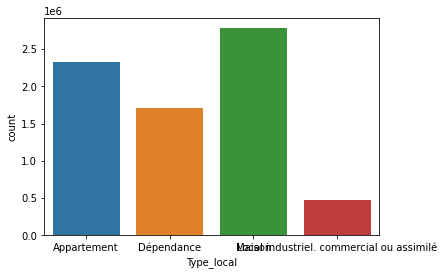

In [12]:
sns.countplot(df.Type_local)

In [63]:
df_test = pd.DataFrame(df.groupby(['Type_de_voie'])['Valeur_fonciere'].count())
df_test.sort_values('Valeur_fonciere').shape

(150, 1)

,Valeur_fonciere
Type_local,
Appartement,5.807725e+12
Dépendance,2.408013e+12
Local industriel. commercial ou assimilé,1.234074e+12
Maison,1.193159e+12


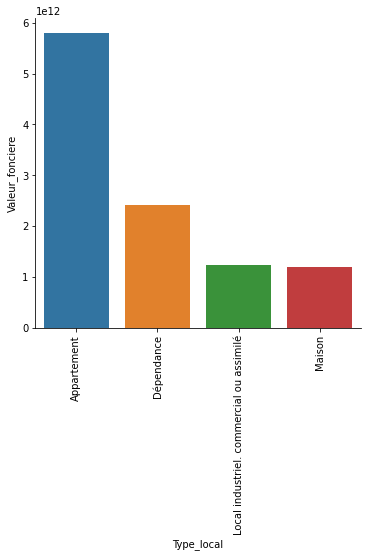

In [17]:
df_grp = df.groupby(['Type_local'])['Valeur_fonciere'].sum()
df_grp = pd.DataFrame(df_grp)
g = sns.catplot(x=df_grp.index, y='Valeur_fonciere', data = df_grp, kind='bar')
g.set_xticklabels(rotation=90)
df_grp.head()

,Prix_par_m_bati
Type_local,
Appartement,1.196519e+11
Dépendance,1.199478e+09
Local industriel. commercial ou assimilé,3.329098e+10
Maison,1.417523e+10


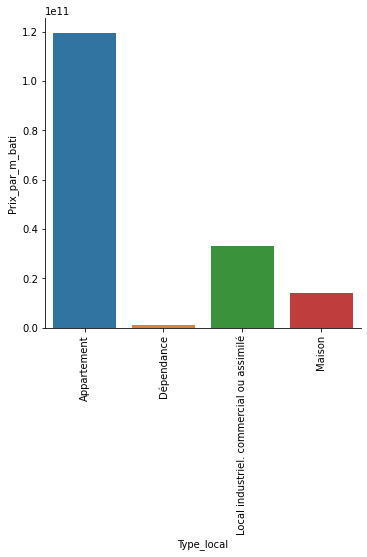

In [32]:
df_grp = df.groupby(['Type_local'])['Prix_par_m_bati'].sum()
df_grp = pd.DataFrame(df_grp)
g = sns.catplot(x=df_grp.index, y='Prix_par_m_bati', data = df_grp, kind='bar')
g.set_xticklabels(rotation=90)
df_grp.head()

In [38]:
df.head()

,Date_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Prix_par_m_bati,Prix_par_m_terrain
Id,,,,,,,,,,,,,,
0,2019-04-01,37220.0,26.0,RUE,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,01,Appartement,20.0,1.0,NaN,1861.000000,0.000000
1,2019-04-01,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,Appartement,62.0,3.0,NaN,2985.483871,0.000000
2,2019-04-01,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,Dépendance,0.0,0.0,NaN,0.000000,0.000000
3,2019-08-01,209000.0,3.0,RUE,DES CHAMPAGNES,1160.0,PRIAY,01,Maison,90.0,4.0,940.0,2322.222222,222.340426
4,2019-07-01,134900.0,5.0,LOT,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,01,Maison,101.0,5.0,490.0,1335.643564,275.306122


In [20]:
import json
import time
import requests

In [21]:
#test de l'appel de l'API et du json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)


t = time.time()
response = requests.get("https://api-adresse.data.gouv.fr/search/?q=8+bd+de+l+hopital+paris+75013&limit=2")
print(time.time()-t, " secondes")
jprint(response.json())


0.16933631896972656  secondes
{
    "attribution": "BAN",
    "features": [
        {
            "geometry": {
                "coordinates": [
                    2.360283,
                    48.837446
                ],
                "type": "Point"
            },
            "properties": {
                "city": "Paris",
                "citycode": "75113",
                "context": "75, Paris, \u00cele-de-France",
                "district": "Paris 13e Arrondissement",
                "id": "75113_4649",
                "importance": 0.78778,
                "label": "Boulevard de l'H\u00f4pital 75013 Paris",
                "name": "Boulevard de l'H\u00f4pital",
                "postcode": "75013",
                "score": 0.6023288943488944,
                "type": "street",
                "x": 653044.83,
                "y": 6859900.68
            },
            "type": "Feature"
        }
    ],
    "licence": "ETALAB-2.0",
    "limit": 2,
    "query": "8 bd de l hopita

In [26]:
#je n'exécute pas, je vais corriger on the fly
df.No_voie.replace(to_replace=' ', value=0.0, inplace=True)
values = {'No_voie': ' ', 'Type_de_voie': ' ', 'Voie': ' ', 'Code_postal': ' ', }
df.fillna(value=values, inplace=True)

In [28]:
def row_to_adress_fields(df, i):
    no_voie = str(int(df['No_voie'][i]))
    type_de_voie = df['Type_de_voie'][i].replace(' ', '+')
    voie = df['Voie'][i].replace(' ', '+')
    code_postal = str(int(df['Code_postal'][i])).replace(' ', '+')
    commune = df['Commune'][i].replace(' ', '+')
    if no_voie == 0.0:
        adress = type_de_voie + '+' + voie + '+' + code_postal + '+' + commune
    else:
        adress = no_voie + '+' + type_de_voie + '+' + voie + '+' + code_postal + '+' + commune
    return adress

url = "https://api-adresse.data.gouv.fr/search/?q="
end_url = '&limit=1'
list_dic = []
t = time.time()

df['Longitude'] = 0.0
df['Latitude'] = 0.0

#les index de df ne sont pas successifs. il fallait parcourir les index de df au lieu de range(len(df))
for i in df.index[:100]:
    adress = row_to_adress_fields(df, i)
    response = requests.get(url + adress + end_url)
    result = response.json()
    df['Longitude'][i] = result['features'][0]['geometry']['coordinates'][0]
    df['Latitude'][i] = result['features'][0]['geometry']['coordinates'][1]
    if i % (100//10) == 0:
        print(time.time()-t, " secondes pour charger ", (i//10))


print(time.time()-t, " secondes")

0.30370187759399414  secondes pour charger  0
1.576554298400879  secondes pour charger  0
2.811964273452759  secondes pour charger  0
4.054694414138794  secondes pour charger  0
5.386611700057983  secondes pour charger  0
6.513110637664795  secondes pour charger  0
7.637644529342651  secondes pour charger  0
9.712125539779663  secondes pour charger  0
11.209997653961182  secondes pour charger  0
12.484461069107056  secondes pour charger  0
13.804218769073486  secondes pour charger  1
13.915932655334473  secondes


In [166]:
df.drop(columns=['Longitude', 'Latitude'], inplace=True)

In [176]:
df[df.index > 80].head(5)

,Date_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Prix_par_m_bati,Prix_par_m_terrain
Id,,,,,,,,,,,,,,
81,2019-03-01,6000,0,,CHEVRIER,1310,MONTRACOL,01,NaN,NaN,0,1356.0,0.000000,4.424779
82,2019-01-15,133000,14,BD,DE L HIPPODROME,1000,BOURG-EN-BRESSE,01,Appartement,77.0,4,NaN,1727.272727,0.000000
83,2019-01-15,133000,14,BD,DE L HIPPODROME,1000,BOURG-EN-BRESSE,01,Dépendance,0.0,0,NaN,0.000000,0.000000
84,2019-01-16,9000,49,AV,DE MACON,1000,BOURG-EN-BRESSE,01,Dépendance,0.0,0,NaN,0.000000,0.000000
85,2019-01-21,62500,28,RUE,BERNARD GANGLOFF,1160,PONT-D AIN,01,Local industriel. commercial ou assimilé,130.0,0,NaN,480.769231,0.000000


In [188]:
df.Valeur_fonciere.fillna(0, inplace=True)
df['Valeur_fonciere'] = df.Valeur_fonciere.apply(int)

df.No_voie.fillna(0, inplace=True)
df['No_voie'] = df.No_voie.apply(int)

df.Nombre_pieces_principales.fillna(0, inplace=True)
df['Nombre_pieces_principales'] = df.Nombre_pieces_principales.apply(int)

#on écrit une function pour gérer les exceptions (caractères non int) lors de la conversion en int
def handle_special_to_int(string):
    try:
        return int(string)
    except:
        return 0

df.Code_postal.fillna(0, inplace=True)
df['Code_postal'] = df.Code_postal.apply(handle_special_to_int)

In [178]:
df.columns

Index(['Date_mutation', 'Valeur_fonciere', 'No_voie', 'Type_de_voie', 'Voie',
       'Code_postal', 'Commune', 'Code_departement', 'Type_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Surface_terrain',
       'Prix_par_m_bati', 'Prix_par_m_terrain'],
      dtype='object')

In [213]:
df.reset_index(inplace=True)

In [179]:
df_adress_csv = df.drop(columns=['Date_mutation', 'Valeur_fonciere','Type_local', 'Surface_reelle_bati', 'Nombre_pieces_principales', 'Surface_terrain','Prix_par_m_bati', 'Prix_par_m_terrain'])
df_adress_csv.to_csv('processed_2015_2019_to_geo_complete.csv', sep = ',')

In [214]:
df_adress_csv_2 = df.No_voie.apply(str) + ' ' + df.Type_de_voie + ' ' + df.Voie + ' ' + df.Code_postal.apply(str) + ' ' + df.Commune
df_adress_csv_2.head(5)

0       26 RUE DE MONTHOLON 1000 BOURG-EN-BRESSE
1    22 RUE GEN DELESTRAINT 1000 BOURG-EN-BRESSE
2    22 RUE GEN DELESTRAINT 1000 BOURG-EN-BRESSE
3                3 RUE DES CHAMPAGNES 1160 PRIAY
4     5 LOT LE BIOLAY 1370 SAINT-ETIENNE-DU-BOIS
dtype: object

In [223]:
l = len(df)
lengths = []
length = 0
slices = 12

#on decoupe le dataset en "slices" fichiers pour les transformer car le file transfert est limité à 50Mo
for i in range(slices-1):
    df_adress_csv_2[ (i*l)//slices : (((i+1)*l)//slices) ].to_csv('processed_2015_2019_to_geo_'+str(i)+'.csv', sep = ',')
    lengths.append(len(df_adress_csv_2[ (i*l)//slices : (((i+1)*l)//slices) ]))
    length += lengths[i]

df_adress_csv_2[ ((slices-1)*l)//6 :].to_csv('processed_2015_2019_to_geo_'+str(5)+'.csv', sep = ',')
lengths.append(len(df_adress_csv_2[ ((slices-1)*l)//slices :] ))
length += lengths[slices-1]

print(lengths)
print(length)
print(len(df))

[1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065, 1040065]
12480780
12480780


In [216]:
len(df_adress_csv_2)

12480780